# Lung cancer prediction

# 
Lung cancer is the **leading cause** of cancer death worldwide. An estimated **236,740** people will be diagnosed with lung cancer in 2022 in the U.S. 1 IN 16 people will be diagnosed with lung cancer in their lifetime – **1 in 15** men, and **1 in 17** women. Approximately 130,180 American lives are lost annually.

![Picture title](data/image-20220515-230711.png)

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

## Importing libraries

In [3]:
%pip install --upgrade pip
%pip install xgboost
%pip install imblearn

     |████████████████████████████████| 2.1 MB 14.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [138]:
import numpy as np
import pandas as pd

import joblib

import plotly.graph_objects as go 
import plotly.express as px

import matplotlib.pyplot as plt
plt.style.use( 'seaborn-whitegrid')

import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

## Load the data

In [5]:
data = pd.read_csv('data/lung_cancer.csv')

In [6]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
data.YELLOW_FINGERS.value_counts()

2    176
1    133
Name: YELLOW_FINGERS, dtype: int64

## Understand lung cancer dataset

### Characteristics:

Total no. of attributes: 16<br>
No .of instances: 284
<br><br>
Attribute information:
<br>

        - Gender: M(male), F(female)
        - Age: Age of the patient
        - Smoking: YES=2 , NO=1.
        - Yellow fingers: YES=2 , NO=1.
        - Anxiety: YES=2 , NO=1.
        - Peer_pressure: YES=2 , NO=1.
        - Chronic Disease: YES=2 , NO=1.
        - Fatigue: YES=2 , NO=1.
        - Allergy: YES=2 , NO=1.
        - Wheezing: YES=2 , NO=1
        - Alcohol: YES=2 , NO=1.
        - Coughing: YES=2 , NO=1.
        - Shortness of Breath: YES=2 , NO=1.
        - Swallowing Difficulty: YES=2 , NO=1.
        - Chest pain: YES=2 , NO=1.
        - Lung Cancer: YES , NO.

<br>

[Dataset source](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer)

## Preliminary Data Exploration

In [8]:
# what's the shape of data?

data.shape

(309, 16)

In [9]:
print('Rows: ', data.shape[0])
print('Columns: ', data.shape[1])

Rows:  309
Columns:  16


In [10]:
print('\nColumn names: \n', *data.columns, sep = '\n     ')


Column names: 

     GENDER
     AGE
     SMOKING
     YELLOW_FINGERS
     ANXIETY
     PEER_PRESSURE
     CHRONIC DISEASE
     FATIGUE 
     ALLERGY 
     WHEEZING
     ALCOHOL CONSUMING
     COUGHING
     SHORTNESS OF BREATH
     SWALLOWING DIFFICULTY
     CHEST PAIN
     LUNG_CANCER


## Data Cleaning
*Check for missing values and duplicates*

In [11]:
data.isnull().any()

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

*There is no any missing value in our coulmns*

## Descriptive statistics

In [12]:
data.AGE.describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

In [13]:
print('Avarage age of people in our dataset: ', round(data.AGE.mean()))

Avarage age of people in our dataset:  63


## Visualiza the features

*Add boxplot and histogram by age and diagnose*

In [14]:
cancer = data[data.LUNG_CANCER == 'YES'].iloc[:, 2:-1].apply(lambda x: (len(x[x == 1]), len(x[x == 2])))
cancer

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,115,107,128,125,128,81,103,107,105,101,94,130,110
1,155,163,142,145,142,189,167,163,165,169,176,140,160


In [15]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        name = 'NO',
        y = cancer.iloc[0].values,
        x = cancer.columns,
        orientation='v'
    )
)

fig.add_trace(
    go.Bar(
        name = 'YES',
        y = cancer.iloc[1].values,
        x = cancer.columns,
        orientation='v'
    )
)

fig.update_layout(title = 'Habits/symptoms of people with cancer')
fig.show()

In [16]:
cancer_free = data[data.LUNG_CANCER == 'NO'].iloc[:, 2:-1].apply(lambda x: (len(x[x == 1]), len(x[x == 2])))
cancer_free

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,20,26,27,29,25,20,34,30,32,29,17,34,27
1,19,13,12,10,14,19,5,9,7,10,22,5,12


In [17]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        name = 'NO',
        y = cancer_free.iloc[0].values,
        x = cancer_free.columns,
        orientation='v'
    )
)

fig.add_trace(
    go.Bar(
        name = 'YES',
        y = cancer_free.iloc[1].values,
        x = cancer_free.columns,
        orientation='v'
    )
)

fig.update_layout(title = 'Habits/symptoms of cancer-free people',)
fig.show()

In [18]:
fig = go.Figure()

fig.add_trace(go.Histogram(x = data['AGE'].values))

## Realtionship in the data

In [19]:
corr = data.copy()
corr['LUNG_CANCER'] = corr['LUNG_CANCER'].map({'YES' : 2, 'NO' : 1})
corr.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533


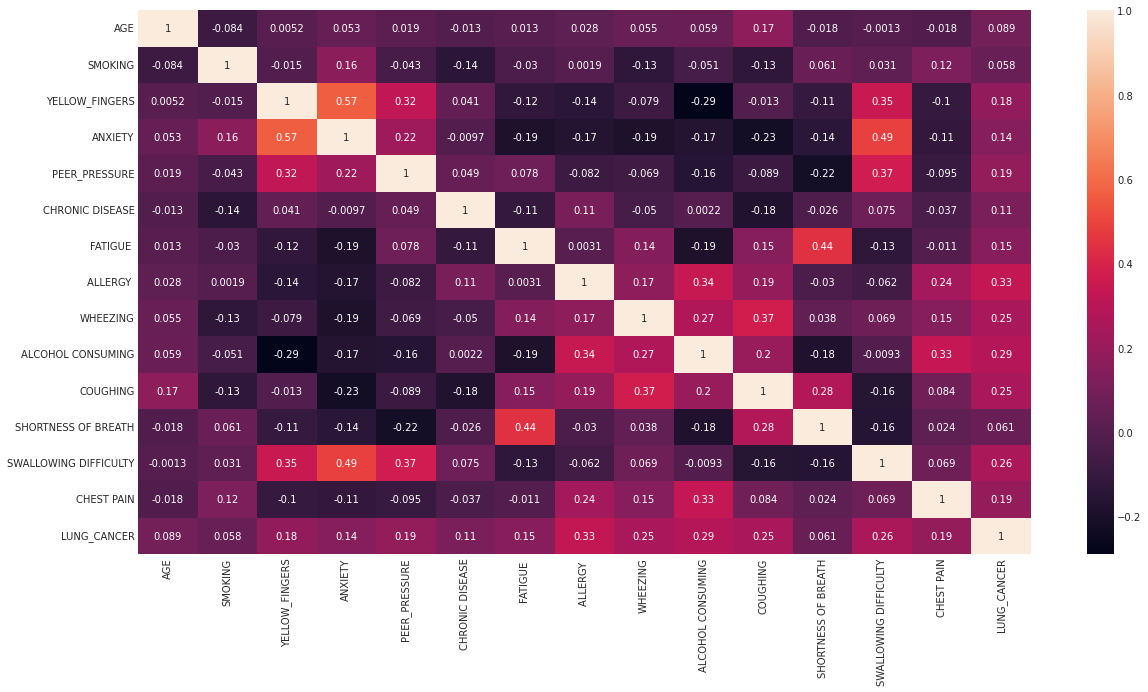

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(corr.corr(), annot=True);

In [21]:
px.imshow(corr[['ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'LUNG_CANCER']].corr(), text_auto=True, color_continuous_scale='Blues')

## Preparing data for model

In [132]:
x = data.drop('LUNG_CANCER', axis = 1).copy()
y = data.LUNG_CANCER.copy()

In [133]:
le = LabelEncoder()
y = le.fit_transform(y)
y[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [134]:
col_trans = make_column_transformer(
    (OrdinalEncoder(), ['GENDER']),
    remainder='passthrough'
)
col_trans.fit(x)
x = col_trans.transform(x)
x

array([[ 1., 69.,  1., ...,  2.,  2.,  2.],
       [ 1., 74.,  2., ...,  2.,  2.,  2.],
       [ 0., 59.,  1., ...,  2.,  1.,  2.],
       ...,
       [ 1., 58.,  2., ...,  1.,  1.,  2.],
       [ 1., 67.,  2., ...,  2.,  1.,  2.],
       [ 1., 62.,  1., ...,  1.,  2.,  1.]])

In [135]:
scal = MinMaxScaler()
scal.fit(x)
x = scal.transform(x)
x[:2]

array([[1.        , 0.72727273, 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.8030303 , 1.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ]])

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((247, 15), (62, 15))

## Train classification model(XGBoost)

What's classification?

Why XGBoost?

In [117]:
model = XGBClassifier(learning_rate=0.15,n_estimators=5000,use_label_encoder=False,random_state=40)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=40,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_pred, y_test)
acc

0.8870967741935484

In [119]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.91      0.96      0.94        55

    accuracy                           0.89        62
   macro avg       0.71      0.62      0.65        62
weighted avg       0.87      0.89      0.87        62



In [ ]:
# cross_val_score(pipeline, X, y, cv = 5, scoring = 'accuracy')

## Make pipeline and save

In [136]:
pipeline = make_pipeline(col_trans, scal, model)

In [137]:

pipeline.predict(data.iloc[[0],:-1])

array([1])

In [139]:
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

## Load saved model

In [140]:
pipeline = joblib.load('pipeline.pkl')

In [141]:
pipeline.predict(data.iloc[[8],:-1])

array([0])

## Balancing data

In [ ]:
data.LUNG_CANCER.value_counts(normalize=True)

YES    0.873786
NO     0.126214
Name: LUNG_CANCER, dtype: float64

Approximately 87% of data related to people with cancer. It's important to have a balanced dataset for a classification model. The more balanced our data is, the higher accuracy we will have.

In [ ]:
over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((540, 15), (540,))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=384d556c-b984-4c44-9dc9-1c93f0f480b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>